In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("DiamondPricesData.csv")

In [3]:
data=data.drop_duplicates()
print("Shape After deleting duplicate values:",data.shape)

Shape After deleting duplicate values: (53794, 10)


In [4]:
data.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [5]:
cont_data=data.select_dtypes(exclude="object")
cont_data.head()

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

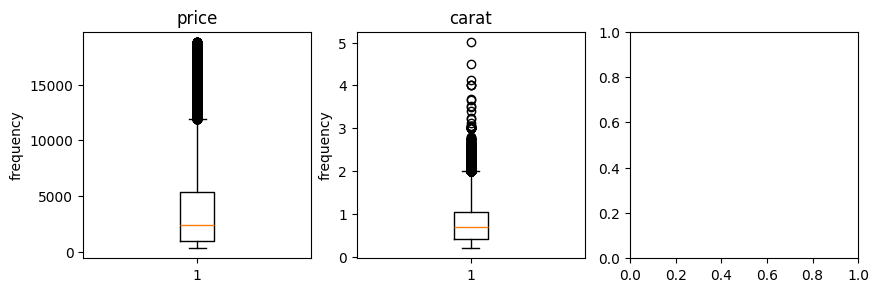

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, col in enumerate(data.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout()
plt.show()

In [10]:
CategoricalColsList=['cut','color','clarity']
import matplotlib.pyplot as plt
fig, Plotcanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList),figsize)

SyntaxError: positional argument follows keyword argument (2692741686.py, line 3)

USING THE DIAMOND DATA SET

In [7]:
cont_data=data.select_dtypes(exclude="object")
cont_data.head()

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75


The graoh is supposed to indicate outliers. dont be misled

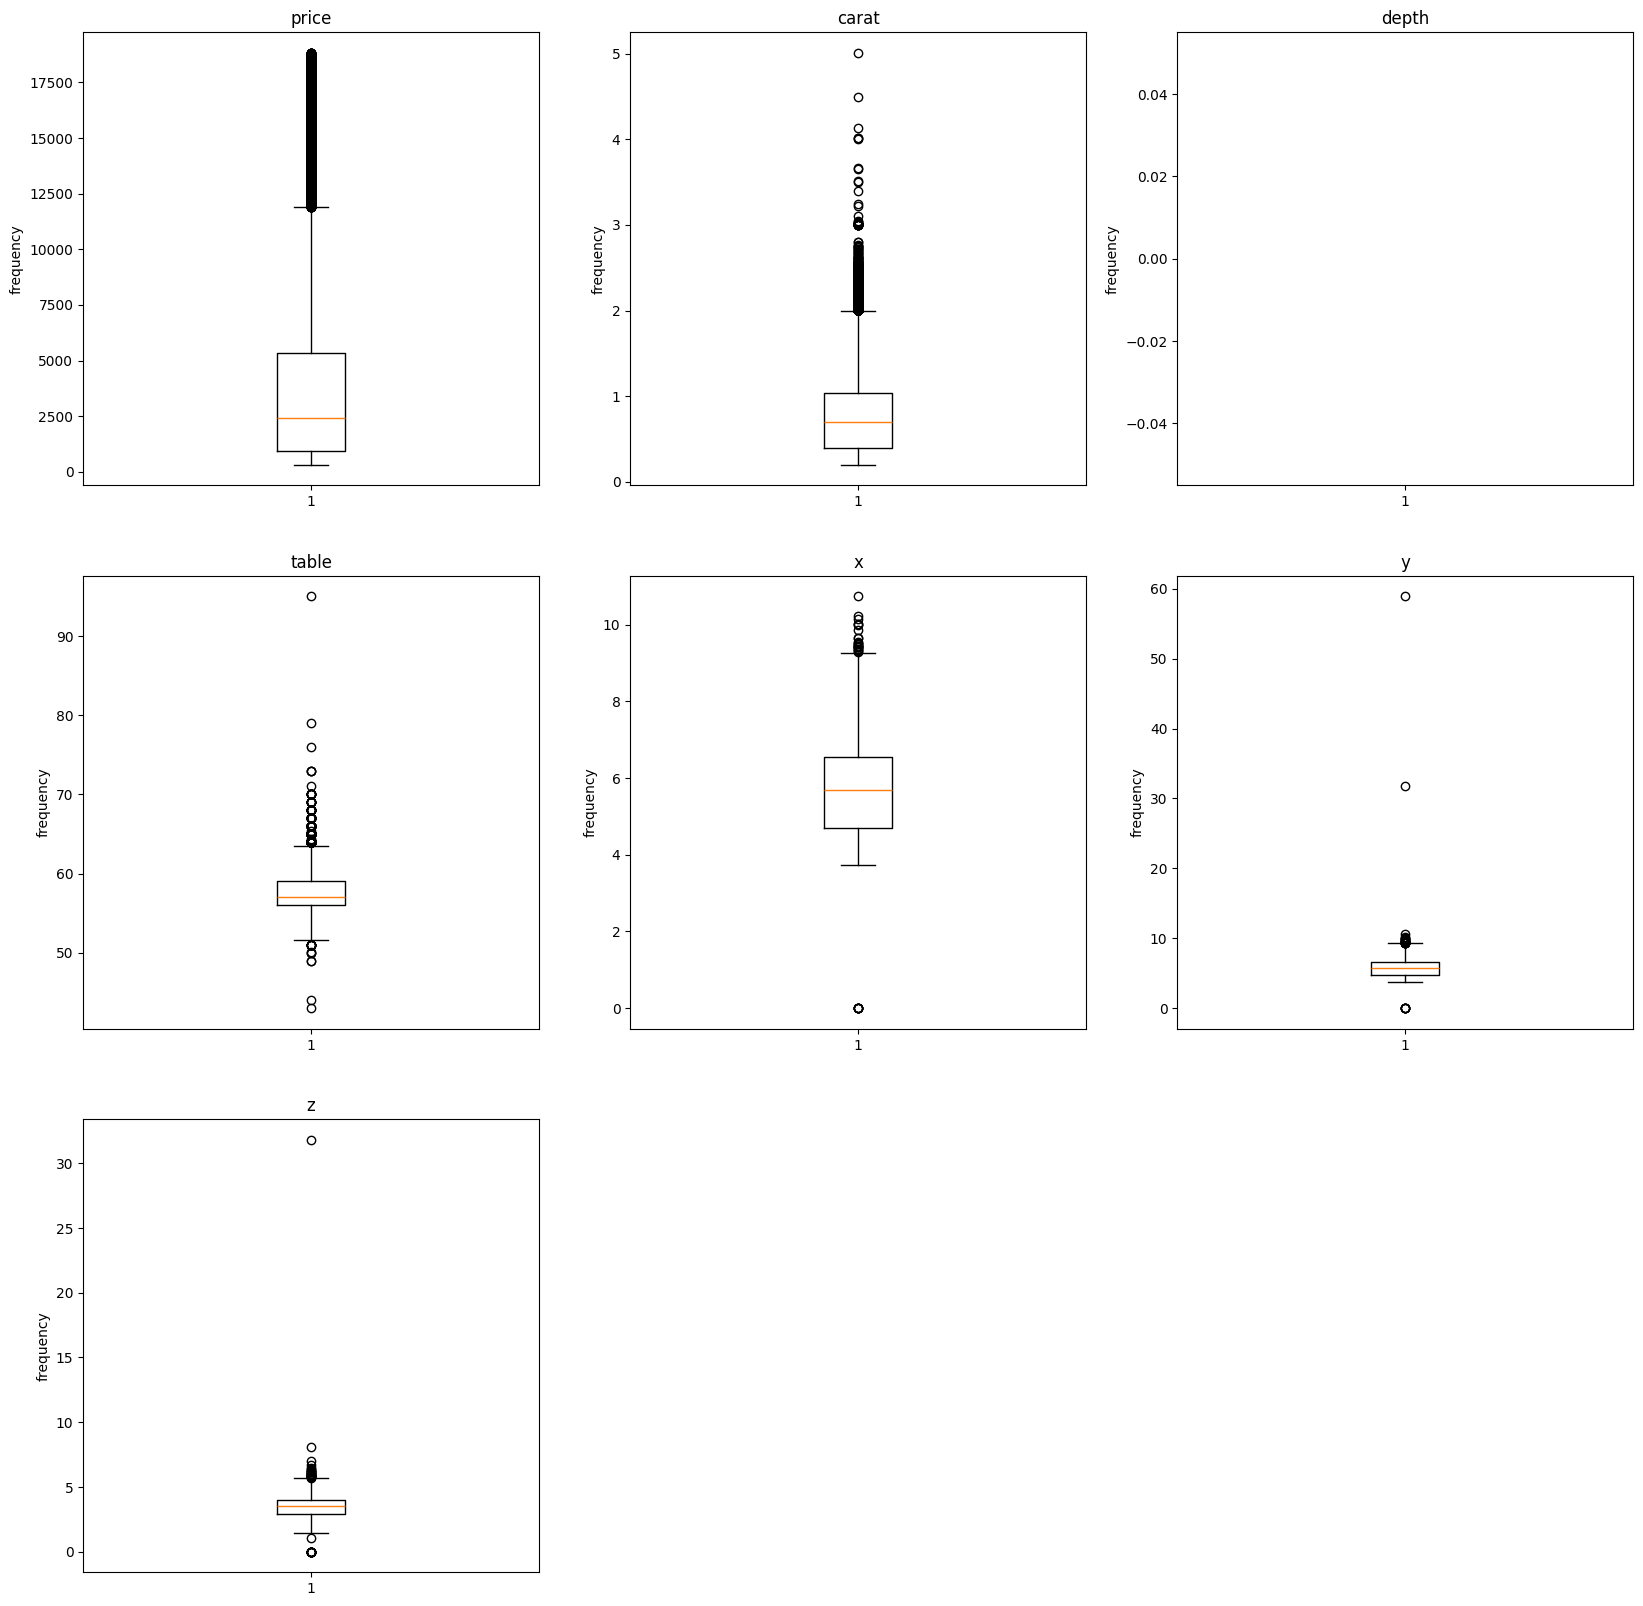

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i,col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout
plt.show()

In [9]:
import numpy as np
def remove_outliers(columns):
    for column in columns:
        lower_quantile=cont_data[column].quantile(.25)
        upper_quantile=cont_data[column].quantile(.75)

        IQR = upper_quantile-lower_quantile

        upper_boundary = upper_quantile+1.5*IQR
        lower_boundary = lower_quantile-1.5*IQR

        cont_data[column] = np.where(cont_data[column]>upper_boundary, upper_boundary, cont_data[column])
        cont_data[column] =np.where(cont_data[column]<lower_boundary, lower_boundary, cont_data[column])


In [10]:
remove_outliers(["price", "carat","depth","table","x","y","z"])

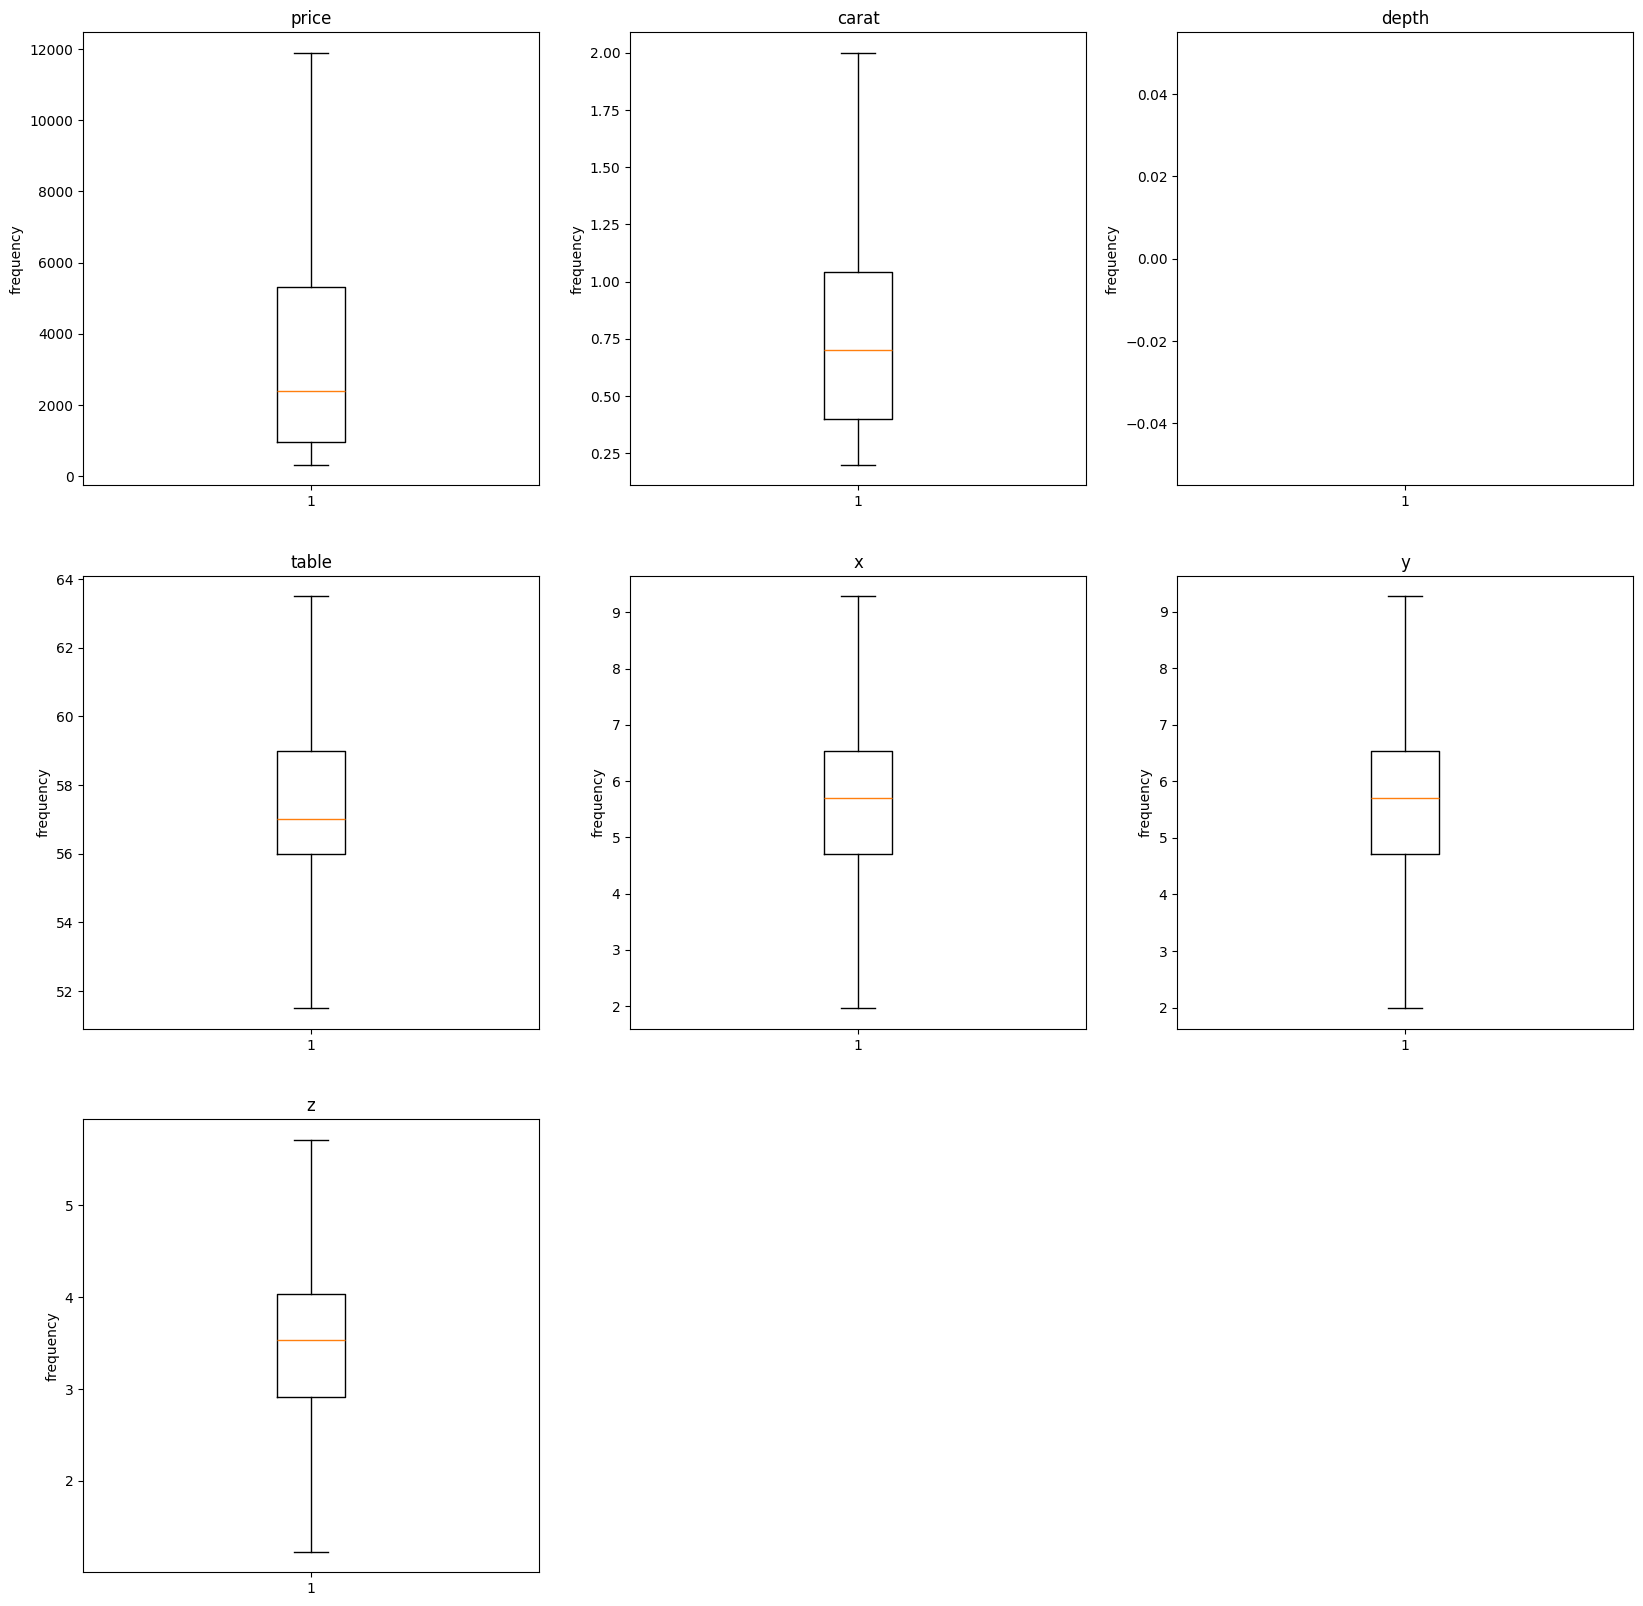

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i,col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    plt.boxplot(cont_data[col])
    plt.title(col)
    plt.ylabel(f"frequency")
plt.tight_layout
plt.show()

SAVING OUR PROCESS WORK

In [12]:
data.to_excel("Clean data.xlsx")

KeyboardInterrupt: 

###the relationships
## CONT VS CONT

Generating a correlation matrix

In [13]:
cont_data.head()

,price,carat,depth,table,x,y,z
0,326.0,0.23,61.50,55.0,3.95,3.98,2.43
1,326.0,0.21,59.80,61.0,3.89,3.84,2.31
2,327.0,0.23,58.75,63.5,4.05,4.07,2.31
3,334.0,0.29,62.40,58.0,4.20,4.23,2.63
4,335.0,0.31,63.30,58.0,4.34,4.35,2.75


<Axes: >

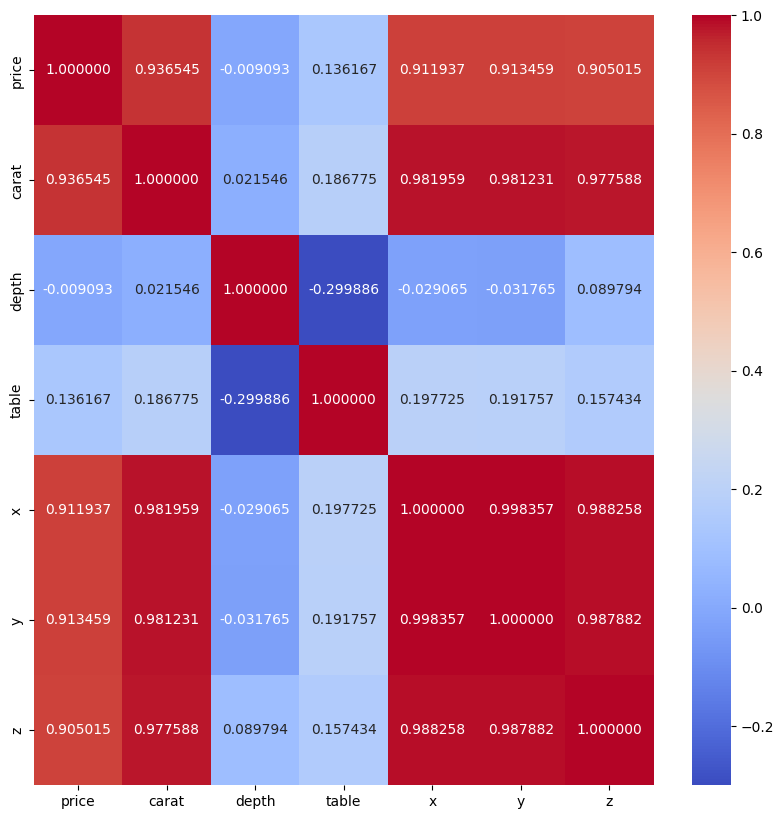

In [14]:
import seaborn as sns
corr_matrix = cont_data.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='2f')

1 ## Visualising with scatter plots

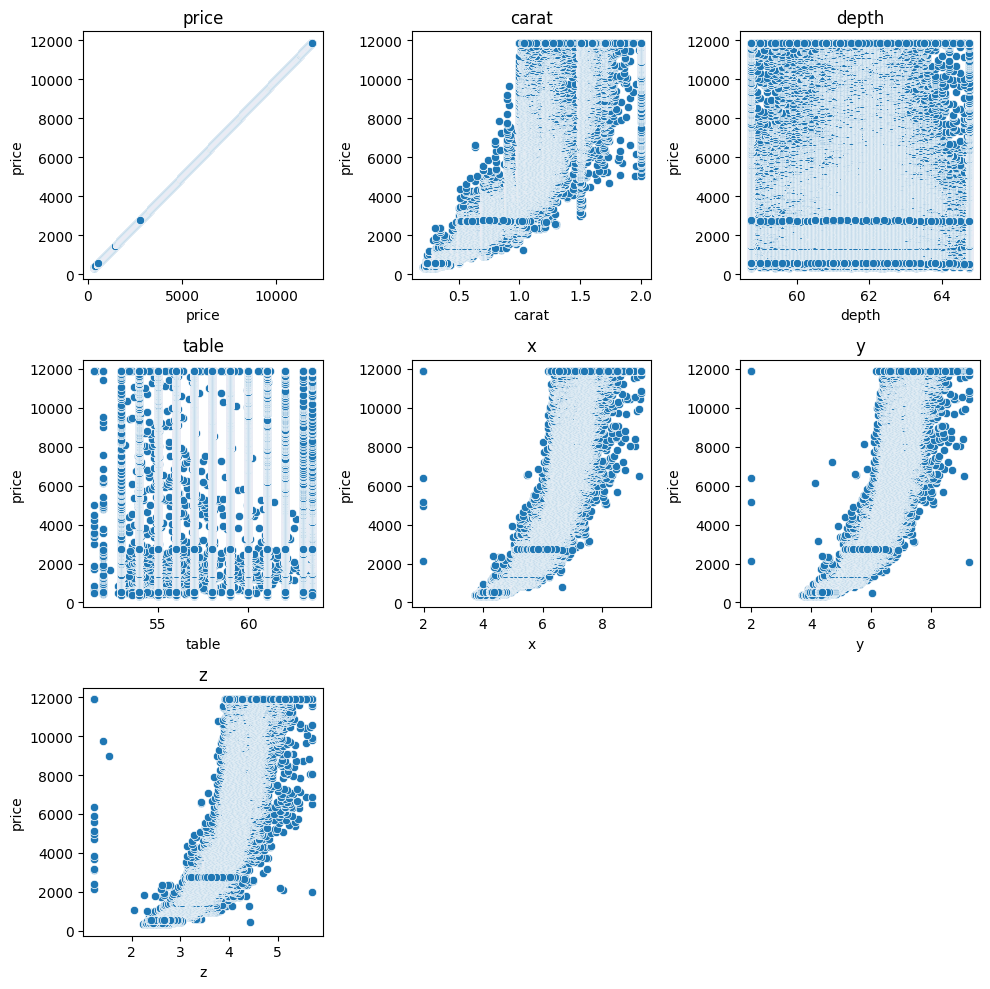

In [15]:


plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(cont_data, y ='price', x= col)
    plt.title(col)
    plt.ylabel(f"price")
plt.tight_layout()
plt.show()

## Cont vs Cat

In [38]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [16]:
from scipy.stats import f_oneway
#for boxplot#
def combined_boxplots(data, var1, var2):
    plt.figure(figsize=(10,10))
    sns.boxplot(x=data[var1], y=data[var2])
    plt.xlabel(f'{var1}')
    plt.ylabel(f'{var2}')
    plt.title(f'Boxplot for {var1} vs{var2}')

    plt.show


#for the ANOVA Test#
def Anova_test(data, var1, var2):
    group_data=[
        group[var1].values for _, group in data.groupby(var2)
    ]
    f_stats, p_value = f_oneway(*group_data)
    
    if p_value > 0.05:
        print(f'{var1} is not significantly correlated with {var2}')
    else:
        print(f'{var1} is significantly correlated with {var2}')

In [17]:
cat_data_diamonds = data.select_dtypes(include='object')

price is significantly correlated with cut
price is significantly correlated with color
price is significantly correlated with clarity


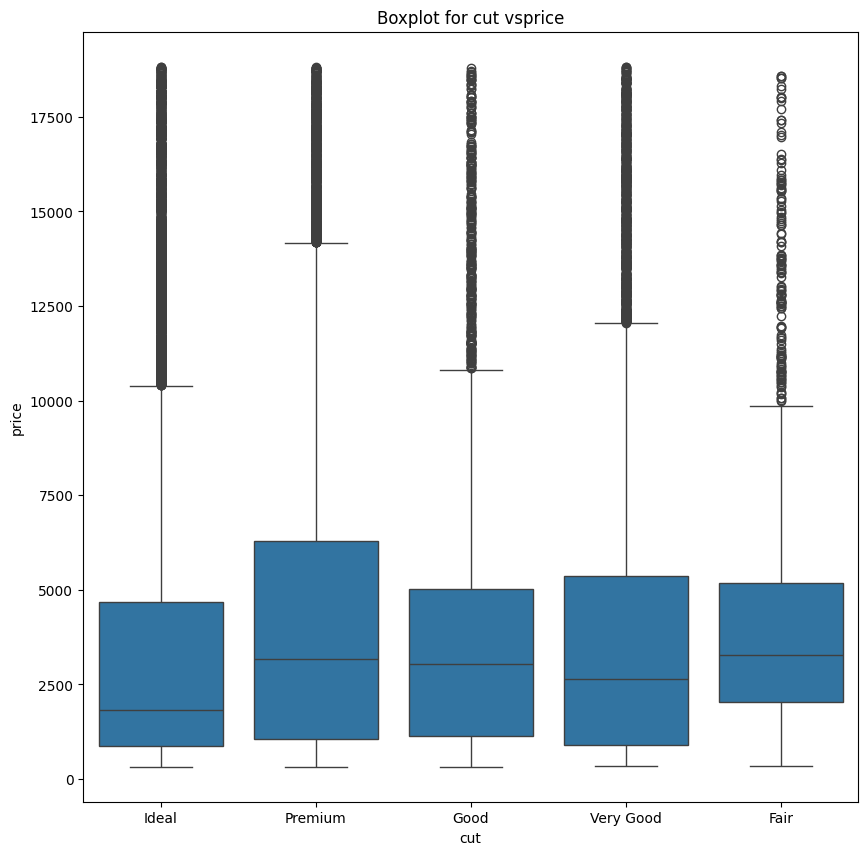

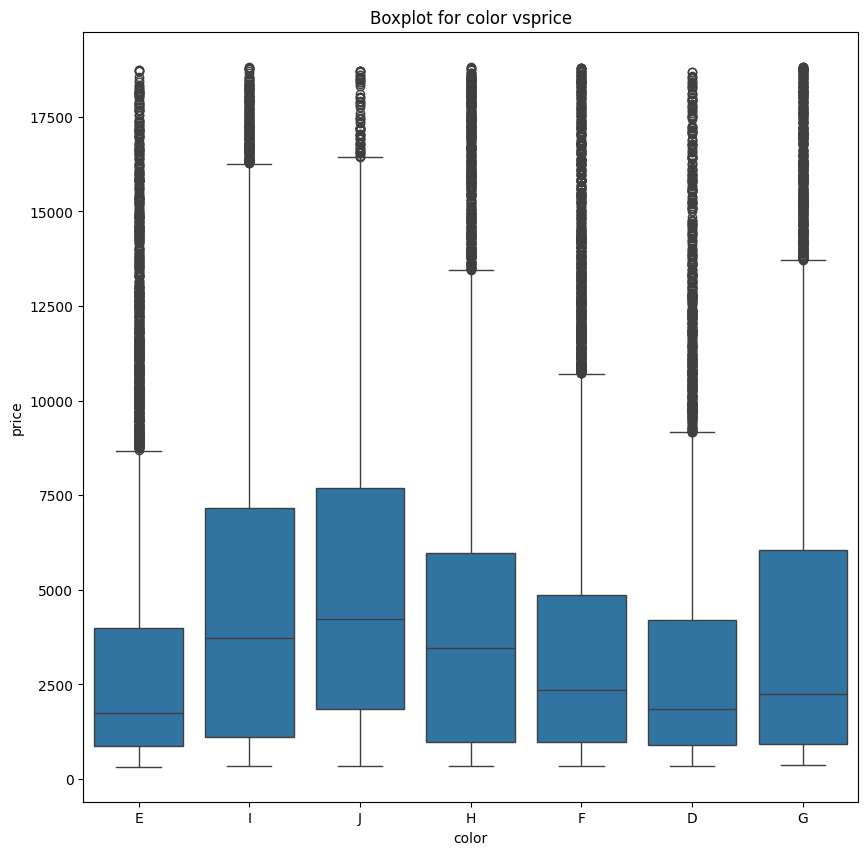

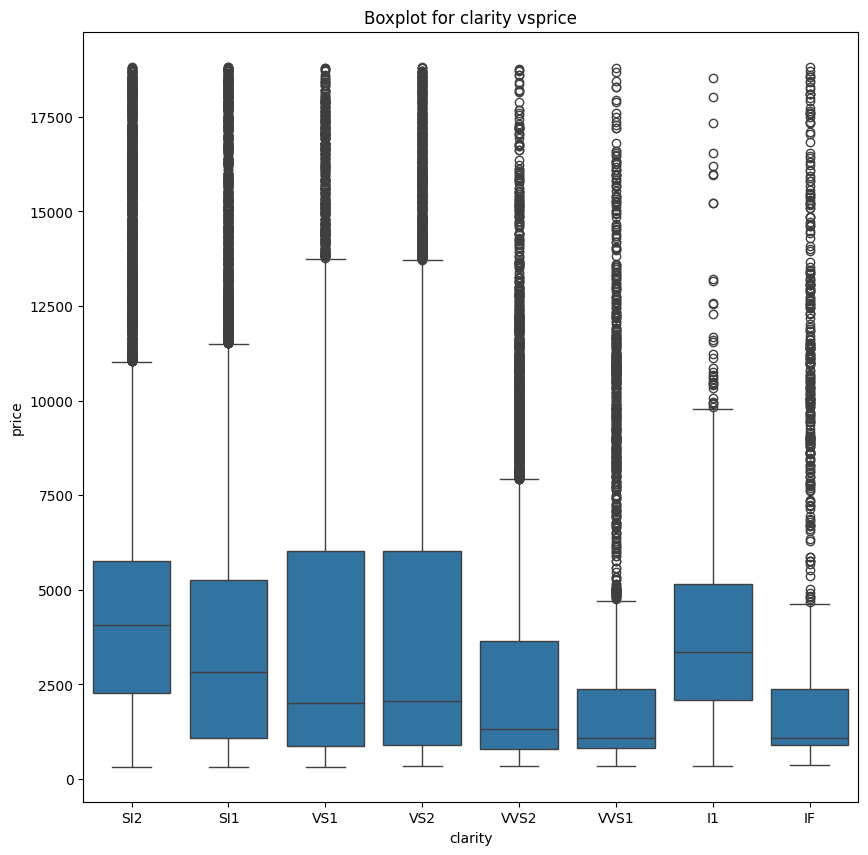

In [18]:
for i  in cat_data_diamonds.columns:
  combined_boxplots(data, i, 'price')
  Anova_test(data, 'price', i)

CAT VS CAT

In [22]:
catdata=cat_data_diamonds.select_dtypes(include='object')
catdata

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


Generating a contigency table 

In [19]:
contigency_table = pd.crosstab(cat_data_diamonds['cut'], cat_data_diamonds['color'])
contigency_table

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,222,309,311,299,174,119
Good,660,931,908,869,699,518,306
Ideal,2823,3893,3819,4863,3104,2090,894
Premium,1599,2331,2321,2917,2351,1422,806
Very Good,1510,2399,2163,2296,1819,1203,677


<Axes: xlabel='color', ylabel='cut'>

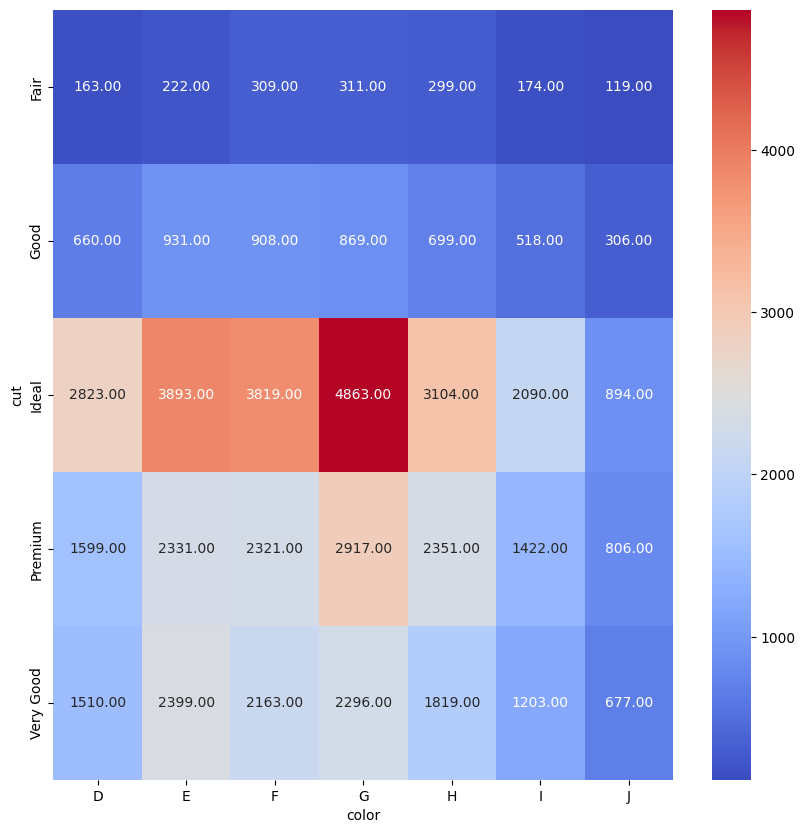

In [24]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(contigency_table, annot=True, cmap='coolwarm', fmt='.2f')


In [25]:
from scipy.stats import chi2_contingency
import warnings 

warnings.filterwarnings('ignore')
chi2, p, dof, expected = chi2_contingency(contigency_table)

print(f"Expected: {expected}\n Chi-square stat : {chi2}\n p-value : {p}\n Degree of Freedom : {dof}")

Expected: [[ 200.56025508  290.25567041  282.65486726  334.19781364  245.60095189
   160.53727597   83.19316576]
 [ 614.23932847  888.94206886  865.66371681 1023.52004164  752.18175058
   491.66425597  254.78883766]
 [2698.33289953 3905.09288317 3802.83185841 4496.28943259 3304.30936268
  2159.86469101 1119.27887261]
 [1726.42568974 2498.5251729  2433.09734513 2876.77980219 2114.13668476
  1381.90728415  716.12802112]
 [1515.44182717 2193.18420466 2135.75221239 2525.21290994 1855.77125009
  1213.0264929   628.61110285]]
 Chi-square stat : 307.4494835211058
 p-value : 5.287278705988795e-51
 Degree of Freedom : 24


Our goal is to use the pvalue to find out whether they are correlated or not. 

In [26]:
if p>0.05:
    print(f'color is not significantly correlated with cut')
else:
    print(f'color is significantly correlated with cut')

color is significantly correlated with cut


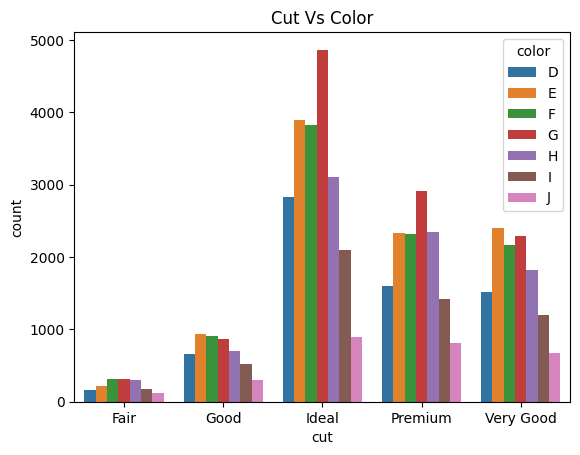

In [30]:
## reseting the index
contigency_table_reset = contigency_table.reset_index()

##melting the df
melted_dataframe = contigency_table_reset.melt(id_vars='cut', var_name='color', value_name='count')
sns.barplot(x ='cut', y ='count', hue = 'color', data =melted_dataframe)
plt.title('Cut Vs Color')
plt.xlabel('cut')
plt.ylabel('count')
plt.show()

In [55]:

import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
def analyze_categorical_features(df, feature1, feature2):
    contigency_table = pd.crosstab(df[feature1], df[feature2])
    chi2, p, dof, expected =chi2_contingency(contigency_table)
    print(f"expected:{expected}\n Chi-square stat: {chi2}\n p-value:{p}\n Degree of Freedom:{dof}")
    if p > 0.05:
        print(f"{feature2} is not significalty correlated with {feature1}")
    else:
        print(f"{feature2} is significantly correlated with {feature1}")
    contigency_table_reset =contigency_table.reset_index()
    melted_dataframe = contigency_table_reset.melt(id_vars=feature1, var_name=feature2, value_name='Count')
    sns.barplot(x = feature1, y = 'Count', hue=feature2, data=melted_dataframe)
    plt.title(f"{feature1} vs{feature2}")
    plt.xlabel(feature1)
    plt.ylabel('Count')
    plt.show

    
    

expected:[[  21.98237722   52.99535264  387.12748634  271.80912369  242.28144403
   363.27363647  108.33747258  150.19310704]
 [  67.28148121  162.20292226 1184.88143659  831.92642302  741.551028
  1111.87193739  331.58859724  459.69617429]
 [ 295.59281704  712.61835892 5205.62917798 3654.96523776 3257.91218351
  4884.87102651 1456.79324832 2019.61794996]
 [ 189.11997621  455.93248318 3330.5561215  2338.44294903 2084.40881883
  3125.33539056  932.05480165 1292.14945905]
 [ 166.02334833  400.250883   2923.8057776  2052.8562665  1829.84652563
  2743.64800907  818.22588021 1134.34330966]]
 Chi-square stat: 4368.367573054015
 p-value:0.0
 Degree of Freedom:28
clarity is significantly correlated with cut


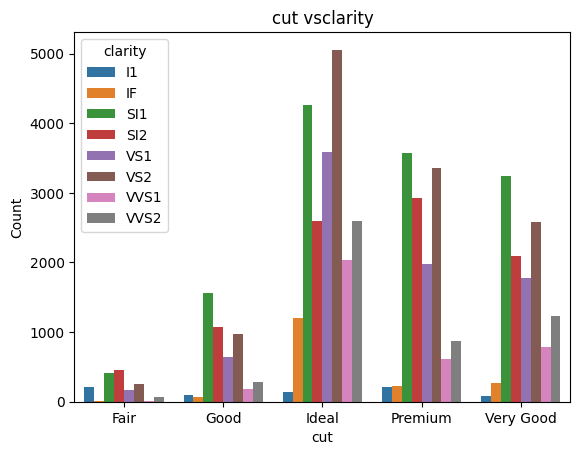

In [57]:
analyze_categorical_features(cat_data_diamonds, 'cut', 'clarity')